# **🧠 Brain Tumor Detection using CNN**

"This project aims to detect brain tumors from MRI images using a Convolutional Neural Network (CNN). The model learns visual patterns to classify images as tumor or non-tumor, supporting early and accurate diagnosis through deep learning techniques."

Dataset Link : https://www.kaggle.com/datasets/vishwapatel10/brain-tumor-dataset

## **Initial Steps:** Mount Drive - Load Dataset - Set Base Path

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

# Base Path (Do change after creating folder's shortcut to your 'My Drive')
base_path = '/content/drive/MyDrive/HireBridge AI   ML Projects/Brain Tumor Dataset'

no_path = os.path.join(base_path, 'no')
yes_path = os.path.join(base_path, 'yes')

# Confirm files
print("🧠 No Tumor Images:", len(os.listdir(no_path)))
print("🎯 Tumor Images:", len(os.listdir(yes_path)))

🧠 No Tumor Images: 2500
🎯 Tumor Images: 2764


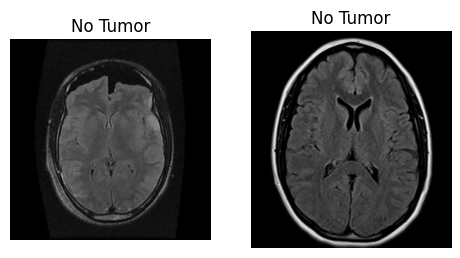

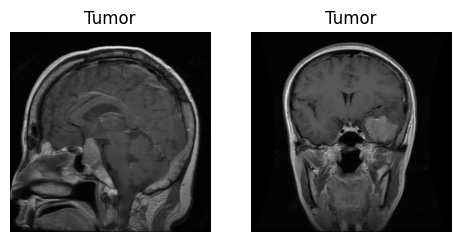

In [ ]:
import matplotlib.pyplot as plt
import random
import cv2

# Show 2 random samples from 'no' class
plt.figure(figsize=(15, 3))
for i in range(2):
    img = cv2.imread(os.path.join(no_path, random.choice(os.listdir(no_path))))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(1, 5, i+1)
    plt.imshow(img)
    plt.title("No Tumor")
    plt.axis('off')
plt.show()

# Show 2 random samples from 'yes' class
plt.figure(figsize=(15, 3))
for i in range(2):
    img = cv2.imread(os.path.join(yes_path, random.choice(os.listdir(yes_path))))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(1, 5, i+1)
    plt.imshow(img)
    plt.title("Tumor")
    plt.axis('off')
plt.show()

# **MODULE 1: PREPROCESSING**



## Importing

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

IMG_SIZE = 100
categories = ['no', 'yes']  # 0 = No Tumor, 1 = Tumor

## **Preprocessing**

In [ ]:
data = []
labels = []

print("Starting image loading and preprocessing...\n")

for category in categories:
    folder_path = os.path.join(base_path, category)
    label = categories.index(category)
    file_list = os.listdir(folder_path)
    print(f"📁 Processing '{category}' ({len(file_list)} images)")

    for idx, img_name in enumerate(file_list):
        img_path = os.path.join(folder_path, img_name)
        try:
            img = cv2.imread(img_path)
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            img = img / 255.0  # Normalize
            data.append(img)
            labels.append(label)

            # Print every 500th image to monitor progress
            if (idx + 1) % 500 == 0:
                print(f"  ✅ {idx + 1} images processed in '{category}'")

        except Exception as e:
            print(f"Error loading {img_path}: {e}")

print("\n✅ Image preprocessing complete.")
print(f"🧠 Total images loaded: {len(data)}")


Starting image loading and preprocessing...

📁 Processing 'no' (2500 images)
  ✅ 500 images processed in 'no'
  ✅ 1000 images processed in 'no'
  ✅ 1500 images processed in 'no'
  ✅ 2000 images processed in 'no'
  ✅ 2500 images processed in 'no'
📁 Processing 'yes' (2764 images)
  ✅ 500 images processed in 'yes'
  ✅ 1000 images processed in 'yes'
  ✅ 1500 images processed in 'yes'
  ✅ 2000 images processed in 'yes'
  ✅ 2500 images processed in 'yes'

✅ Image preprocessing complete.
🧠 Total images loaded: 5264


## Converting To Numpy - Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

print("🔁 Converting data to NumPy arrays...")

X = np.array(data)
y = np.array(labels)

print(f"✅ Features shape: {X.shape}")
print(f"✅ Labels shape: {y.shape}")

# Train-test split (80/20) — stratified to maintain balance
print("🔀 Splitting into training and testing sets...\n\n")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print(f"📊 X_train shape: {X_train.shape} \n")
print(f"📊 y_train shape: {y_train.shape}\n")
print(f"📊 X_test shape: {X_test.shape}\n")
print(f"📊 y_test shape: {y_test.shape}\n")
print("✅ Data split complete.")

🔁 Converting data to NumPy arrays...
✅ Features shape: (5264, 100, 100, 3)
✅ Labels shape: (5264,)
🔀 Splitting into training and testing sets...


📊 X_train shape: (4211, 100, 100, 3) 

📊 y_train shape: (4211,)

📊 X_test shape: (1053, 100, 100, 3)

📊 y_test shape: (1053,)

✅ Data split complete.


## Checking Samples After Preprocessing



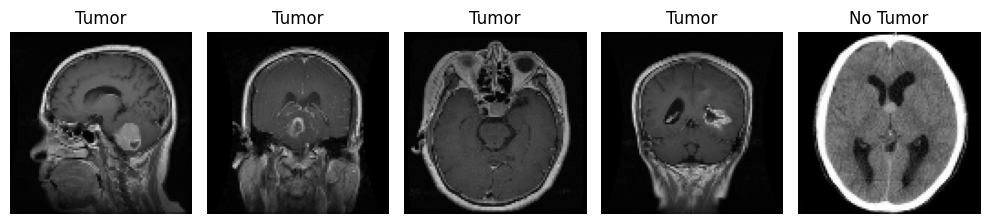

In [ ]:
import matplotlib.pyplot as plt

# Show 5 images from the training set
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_train[i])
    plt.title("Tumor" if y_train[i] == 1 else "No Tumor")
    plt.axis('off')

plt.tight_layout()
plt.show()

## **MODULE 2: DATA AUGMENTATION**

## 🎯 1. Rotation

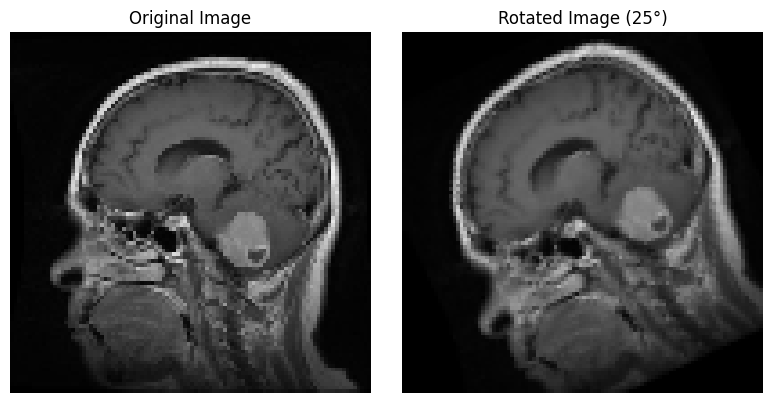

In [ ]:
# Example of rotation augmentation using OpenCV

def rotate_image(image, angle):
    """Rotates an image by the given angle."""
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h))
    return rotated

# Take a sample image from the training set
sample_image = X_train[0]

# Apply rotation
rotated_image = rotate_image(sample_image, 25) # Rotate by 15 degrees

# Display original and rotated images
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(sample_image)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(rotated_image)
plt.title("Rotated Image (25°)")
plt.axis('off')

plt.tight_layout()
plt.show()

## 🔁 2. Flipping (Horizontal/Vertical)


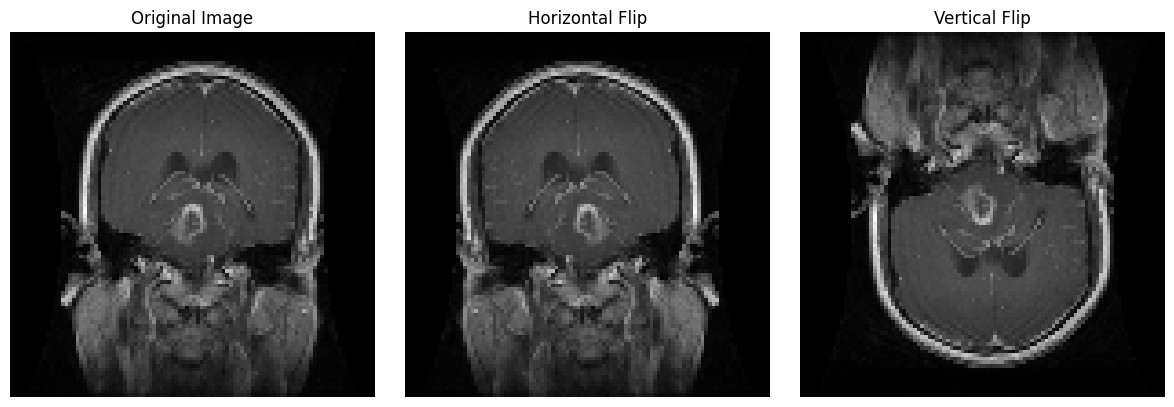

In [ ]:
# Example of flipping augmentation using OpenCV

def flip_image(image, flip_code):
    """Flips an image horizontally (1), vertically (0), or both (-1)."""
    flipped = cv2.flip(image, flip_code)
    return flipped

# Take a sample image from the training set
sample_image = X_train[1] # Use a different sample image

# Apply flips
horizontal_flip = flip_image(sample_image, 1) # Horizontal flip
vertical_flip = flip_image(sample_image, 0)   # Vertical flip

# Display original and flipped images
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(sample_image)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(horizontal_flip)
plt.title("Horizontal Flip")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(vertical_flip)
plt.title("Vertical Flip")
plt.axis('off')

plt.tight_layout()
plt.show()

## ➡️ 3. Translation

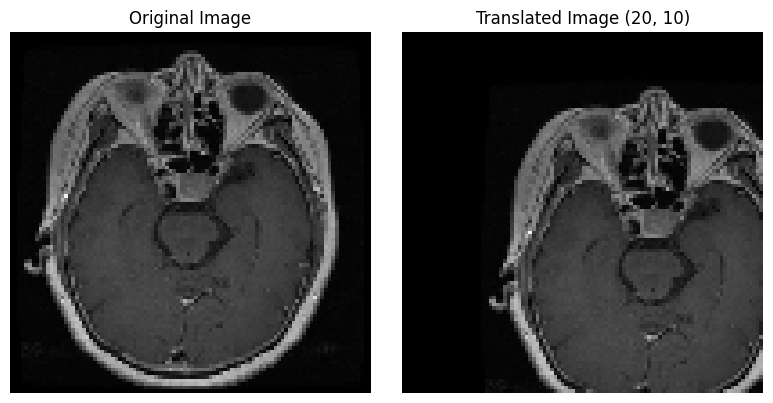

In [ ]:
# Example of translation augmentation using OpenCV

def translate_image(image, tx, ty):
    """Translates an image by (tx, ty)."""
    (h, w) = image.shape[:2]
    M = np.float32([[1, 0, tx], [0, 1, ty]])
    translated = cv2.warpAffine(image, M, (w, h))
    return translated

# Take a sample image from the training set
sample_image = X_train[2] # Use a different sample image

# Apply translation
translated_image = translate_image(sample_image, 20, 10) # Translate by (20, 10) pixels

# Display original and translated images
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(sample_image)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(translated_image)
plt.title("Translated Image (20, 10)")
plt.axis('off')

plt.tight_layout()
plt.show()

##🔍 4. Zooming (In/Out)


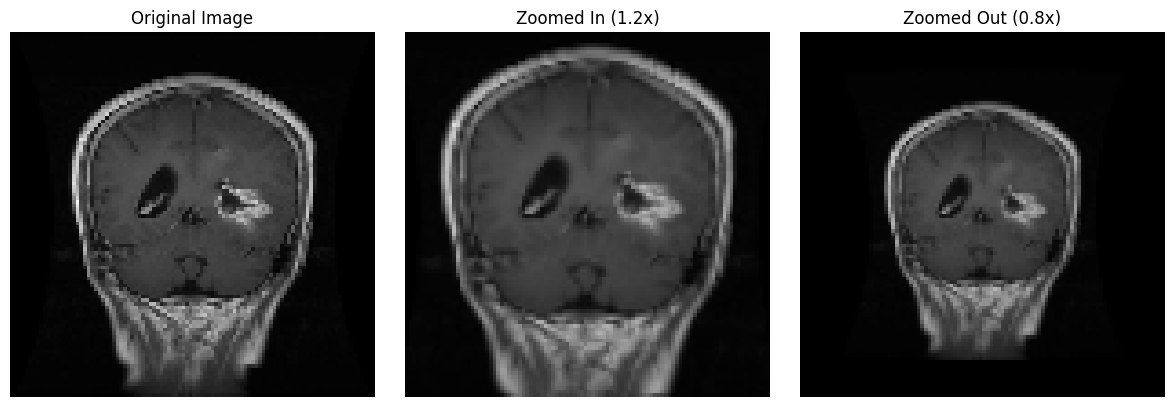

In [ ]:
# Example of zooming augmentation using OpenCV

def zoom_image(image, zoom_factor):
    """Zooms an image by a given factor."""
    (h, w) = image.shape[:2]
    new_h, new_w = int(h * zoom_factor), int(w * zoom_factor)

    if zoom_factor > 1:  # Zoom In
        # Calculate crop region
        start_h = max(0, (new_h - h) // 2)
        start_w = max(0, (new_w - w) // 2)
        end_h = min(new_h, start_h + h)
        end_w = min(new_w, start_w + w)

        # Resize and crop
        resized = cv2.resize(image, (new_w, new_h), interpolation=cv2.INTER_LINEAR)
        zoomed = resized[start_h:end_h, start_w:end_w]

    elif zoom_factor < 1: # Zoom Out
        # Create a black canvas and place the resized image in the center
        zoomed = np.zeros((h, w, 3), dtype=image.dtype)
        resized = cv2.resize(image, (new_w, new_h), interpolation=cv2.INTER_LINEAR)

        start_h = (h - new_h) // 2
        start_w = (w - new_w) // 2
        zoomed[start_h:start_h+new_h, start_w:start_w+new_w] = resized
    else: # No zoom
        zoomed = image

    return zoomed

# Take a sample image from the training set
sample_image = X_train[3] # Use a different sample image

# Apply zoom
zoomed_in_image = zoom_image(sample_image, 1.2) # Zoom in by 20%
zoomed_out_image = zoom_image(sample_image, 0.8) # Zoom out by 20%


# Display original and zoomed images
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(sample_image)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(zoomed_in_image)
plt.title("Zoomed In (1.2x)")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(zoomed_out_image)
plt.title("Zoomed Out (0.8x)")
plt.axis('off')

plt.tight_layout()
plt.show()

## 5. Gaussian Noise Addition

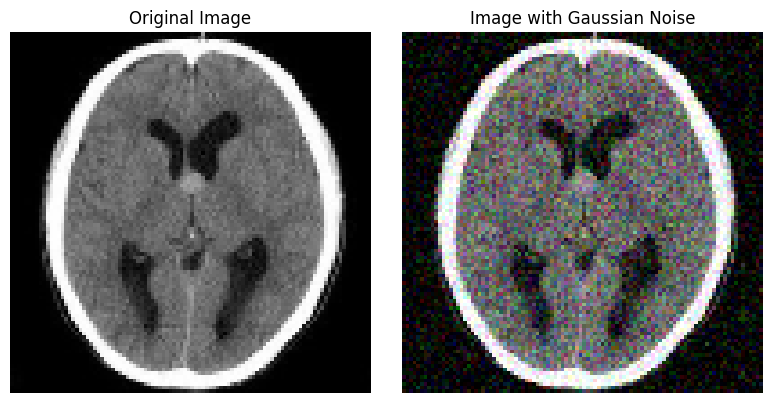

In [ ]:
# Example of Gaussian Noise augmentation

def add_gaussian_noise(image, mean=0, var=0.01):
    """Adds Gaussian noise to an image."""
    row, col, ch = image.shape
    sigma = var**0.5
    gauss = np.random.normal(mean, sigma, (row, col, ch))
    noisy = image + gauss
    noisy = np.clip(noisy, 0, 1) # Clip values to stay within [0, 1] range
    return noisy

# Take a sample image from the training set
sample_image = X_train[4] # Use a different sample image

# Apply Gaussian Noise
noisy_image = add_gaussian_noise(sample_image)

# Display original and noisy images
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(sample_image)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(noisy_image)
plt.title("Image with Gaussian Noise")
plt.axis('off')

plt.tight_layout()
plt.show()

## 🌗 6. Brightness/Contrast Adjustment

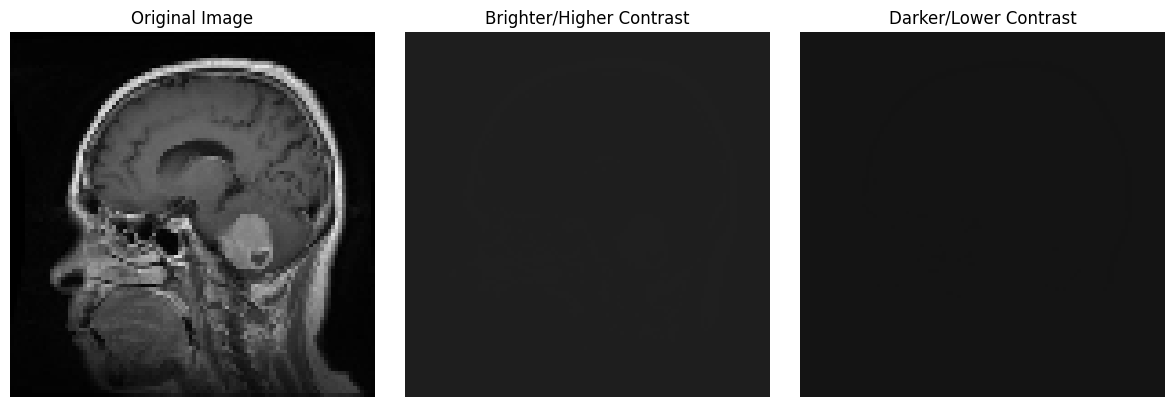

In [ ]:
# Example of Brightness/Contrast augmentation using OpenCV

def adjust_brightness_contrast(image, alpha=1.0, beta=0):
    """Adjusts the brightness and contrast of an image."""
    # alpha controls contrast (1.0-3.0), beta controls brightness (0-100)
    adjusted = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
    return adjusted

# Take a sample image from the training set
sample_image = X_train[0] # Use a sample image

# Apply adjustments
brighter_image = adjust_brightness_contrast(sample_image, alpha=1.2, beta=30) # Increase brightness and contrast
darker_image = adjust_brightness_contrast(sample_image, alpha=0.8, beta=-20) # Decrease brightness and contrast

# Display original and adjusted images
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(sample_image)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(brighter_image)
plt.title("Brighter/Higher Contrast")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(darker_image)
plt.title("Darker/Lower Contrast")
plt.axis('off')

plt.tight_layout()
plt.show()

## 💠 7. Elastic Deformation

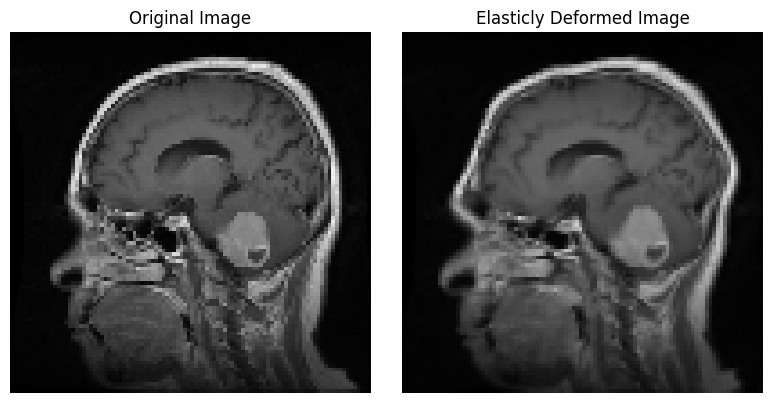

In [ ]:
# Example of Elastic Deformation augmentation

def elastic_transform(image, alpha, sigma, random_state=None):
    """Applies elastic deformation to an image."""
    if random_state is None:
        random_state = np.random.RandomState(None)

    shape = image.shape
    dx = gaussian_filter((random_state.rand(*shape) * 2 - 1), sigma) * alpha
    dy = gaussian_filter((random_state.rand(*shape) * 2 - 1), sigma) * alpha
    dz = np.zeros_like(dx)

    x, y, z = np.meshgrid(np.arange(shape[1]), np.arange(shape[0]), np.arange(shape[2]))
    indices = np.reshape(y + dy, (-1, 1)), np.reshape(x + dx, (-1, 1)), np.reshape(z + dz, (-1, 1))

    # Ensure the input image is of type float32 for map_coordinates
    image = image.astype(np.float32)

    # Adjusting indices for 3D (color image)
    distorted_image = map_coordinates(image, indices, order=1, mode='reflect').reshape(shape)

    # Clip values to stay within [0, 1] range after deformation
    distorted_image = np.clip(distorted_image, 0, 1)

    return distorted_image

# Import necessary libraries for elastic deformation
from scipy.ndimage.interpolation import map_coordinates
from scipy.ndimage.filters import gaussian_filter

# Take a sample image from the training set
sample_image = X_train[0] # Use a sample image

# Apply elastic deformation
# Adjust alpha and sigma values to control the intensity and smoothness of the deformation
alpha_value = 50  # Controls the intensity of the deformation
sigma_value = 5   # Controls the smoothness of the deformation
deformed_image = elastic_transform(sample_image, alpha=alpha_value, sigma=sigma_value)


# Display original and deformed images
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(sample_image)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(deformed_image)
plt.title("Elasticly Deformed Image")
plt.axis('off')

plt.tight_layout()
plt.show()

##  🔲 8. Cropping and Padding

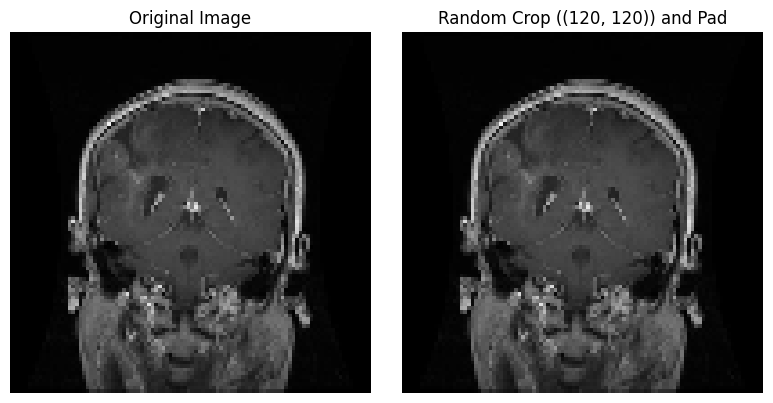

In [ ]:
# Example of Cropping and Padding augmentation

def random_crop_pad(image, crop_size, pad_value=0):
    """Randomly crops and/or pads an image."""
    h, w, _ = image.shape
    ch, cw = crop_size

    # Ensure crop size is not larger than image size
    ch = min(ch, h)
    cw = min(cw, w)

    # Randomly select top-left corner for cropping
    start_h = np.random.randint(0, h - ch + 1)
    start_w = np.random.randint(0, w - cw + 1)

    # Crop the image
    cropped_image = image[start_h:start_h + ch, start_w:start_w + cw]

    # Calculate padding needed
    pad_h = max(0, IMG_SIZE - ch)
    pad_w = max(0, IMG_SIZE - cw)

    # Randomly distribute padding
    pad_top = np.random.randint(0, pad_h + 1)
    pad_bottom = pad_h - pad_top
    pad_left = np.random.randint(0, pad_w + 1)
    pad_right = pad_w - pad_left

    # Pad the cropped image
    padded_image = cv2.copyMakeBorder(cropped_image, pad_top, pad_bottom, pad_left, pad_right, cv2.BORDER_CONSTANT, value=[pad_value, pad_value, pad_value])

    # Resize back to original IMG_SIZE if necessary (due to potential cropping without padding back to full size)
    padded_image = cv2.resize(padded_image, (IMG_SIZE, IMG_SIZE))

    return padded_image

# Take a sample image from the training set
sample_image = X_train[5] # Use a different sample image

# Apply random crop and pad
crop_size = (120, 120) # Define the size to crop to
cropped_padded_image = random_crop_pad(sample_image, crop_size)

# Display original and cropped/padded images
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(sample_image)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cropped_padded_image)
plt.title(f"Random Crop ({crop_size}) and Pad")
plt.axis('off')

plt.tight_layout()
plt.show()

# **MODEULE 3: CNN MODEL BUILDING**

### **1. Conv2D Layer**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D

model = Sequential()

# First Conv2D layer
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(100, 100, 3)))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 32)     │           896 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 896 (3.50 KB)

 Trainable params: 896 (3.50 KB)

 Non-trainable params: 0 (0.00 B)

### **2. MaxPooling2D Layer**

In [ ]:
from tensorflow.keras.layers import MaxPooling2D

# Add MaxPooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 32)     │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 896 (3.50 KB)

 Trainable params: 896 (3.50 KB)

 Non-trainable params: 0 (0.00 B)

## **3. Dropout Layer**

In [ ]:
from tensorflow.keras.layers import Dropout

# Add Dropout layer
model.add(Dropout(0.25))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 49, 49, 32)     │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 896 (3.50 KB)

 Trainable params: 896 (3.50 KB)

 Non-trainable params: 0 (0.00 B)

### **4. 2nd Conv Block**

In [ ]:
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

### **5**.  **3rd Conv Block**

In [ ]:
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 10, 10, 128)    │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,248 (364.25 KB)

 Trainable params: 93,248 (364.25 KB)

 Non-trainable params: 0 (0.00 B)

### **6**.  **Flatten Layer**

In [ ]:
from tensorflow.keras.layers import Flatten

model.add(Flatten())
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12800)          │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,248 (364.25 KB)

 Trainable params: 93,248 (364.25 KB)

 Non-trainable params: 0 (0.00 B)

### **7**. **Dense (Fully Connected) Layer**

In [ ]:
from tensorflow.keras.layers import Dense

# Hidden Dense layer
model.add(Dense(128, activation='relu'))

# Dropout before output
model.add(Dropout(0.5))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,638,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,731,776 (6.61 MB)

 Trainable params: 1,731,776 (6.61 MB)

 Non-trainable params: 0 (0.00 B)

### **8. Output Layer**

In [ ]:
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,638,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,731,905 (6.61 MB)

 Trainable params: 1,731,905 (6.61 MB)

 Non-trainable params: 0 (0.00 B)

# **MODULE 4: MODEL TRAINING**

### **Final Compilation**

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

 1. Compile the Model

In [ ]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


2. Add Callbacks

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import tensorflow as tf

# Optional: Clear backend memory if rerunning
tf.keras.backend.clear_session()

# Callbacks to improve training
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True,
    verbose=1
)

model_checkpoint = ModelCheckpoint(
    'best_brain_tumor_model.keras',
    save_best_only=True,
    monitor='val_loss',
    verbose=1
)

callbacks = [early_stop, model_checkpoint]

3. Fit the Model

In [ ]:
import matplotlib.pyplot as plt

history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=16,
    validation_split=0.2,
    callbacks=[early_stop, model_checkpoint],
    verbose=1
)

Epoch 1/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step - accuracy: 0.6699 - loss: 0.5822
Epoch 1: val_loss improved from inf to 0.30177, saving model to best_brain_tumor_model.keras
211/211 ━━━━━━━━━━━━━━━━━━━━ 83s 378ms/step - accuracy: 0.6705 - loss: 0.5816 - val_accuracy: 0.8660 - val_loss: 0.3018
Epoch 2/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step - accuracy: 0.9010 - loss: 0.2768
Epoch 2: val_loss improved from 0.30177 to 0.18802, saving model to best_brain_tumor_model.keras
211/211 ━━━━━━━━━━━━━━━━━━━━ 77s 365ms/step - accuracy: 0.9011 - loss: 0.2767 - val_accuracy: 0.9300 - val_loss: 0.1880
Epoch 3/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step - accuracy: 0.9220 - loss: 0.2014
Epoch 3: val_loss improved from 0.18802 to 0.16421, saving model to best_brain_tumor_model.keras
211/211 ━━━━━━━━━━━━━━━━━━━━ 83s 368ms/step - accuracy: 0.9220 - loss: 0.2014 - val_accuracy: 0.9419 - val_loss: 0.1642
Epoch 4/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step - accuracy: 0.9437 - loss: 0.1484
E

In [ ]:
model.save("brain_tumor_CNN_model.h5")

# **MODULE 5: Evaluation and Matrics**

In [ ]:
# accuracy_score

from sklearn.metrics import accuracy_score

# Predict probabilities on the test set
y_pred_probs = model.predict(X_test)

# Convert predicted probabilities to binary class predictions
y_pred = (y_pred_probs > 0.5).astype(int).reshape(-1)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Accuracy Score: {accuracy:.4f}")


33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 156ms/step
✅ Accuracy Score: 0.9763


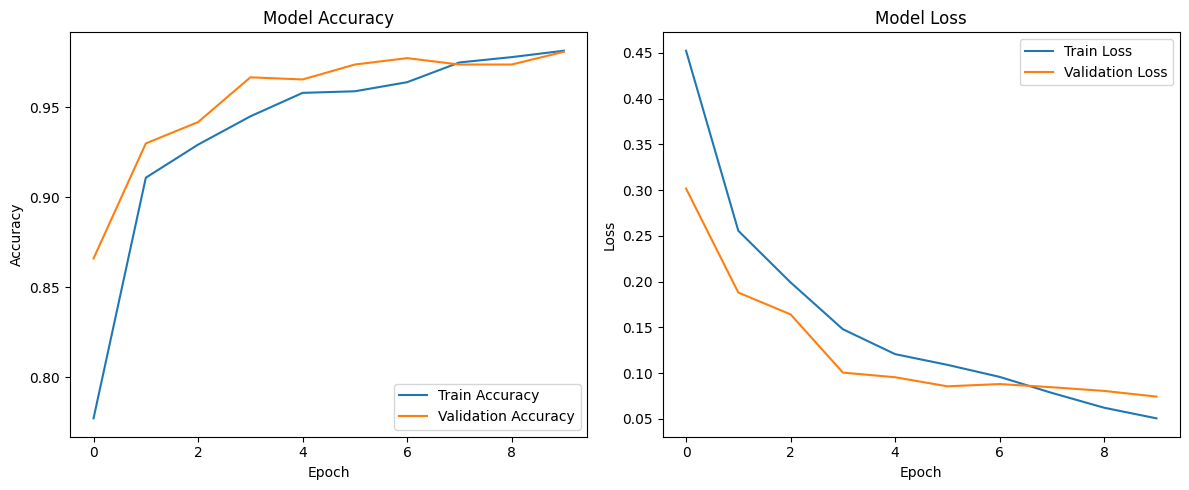

In [ ]:
# 📉 Loss vs Accuracy plots


import matplotlib.pyplot as plt

# Plot training & validation accuracy and loss
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


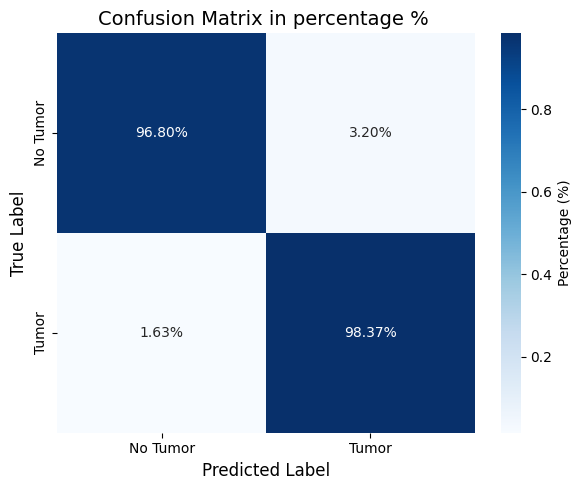

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Normalize for percentage view
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plotting
plt.figure(figsize=(6, 5))
sns.heatmap(cm_normalized, annot=True, fmt=".2%", cmap='Blues',
            xticklabels=["No Tumor", "Tumor"],
            yticklabels=["No Tumor", "Tumor"],
            cbar_kws={'label': 'Percentage (%)'})

plt.title("Confusion Matrix in percentage % ", fontsize=14)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


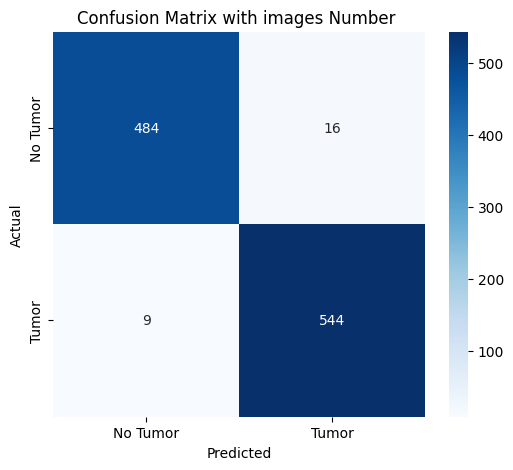

In [ ]:
# 📊 Confusion matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Tumor", "Tumor"], yticklabels=["No Tumor", "Tumor"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix with images Number ')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Classification Report
report = classification_report(y_test, y_pred, target_names=["No Tumor", "Tumor"])
print("📝 Classification Report:\n")
print(report)

📝 Classification Report:

              precision    recall  f1-score   support

    No Tumor       0.98      0.97      0.97       500
       Tumor       0.97      0.98      0.98       553

    accuracy                           0.98      1053
   macro avg       0.98      0.98      0.98      1053
weighted avg       0.98      0.98      0.98      1053



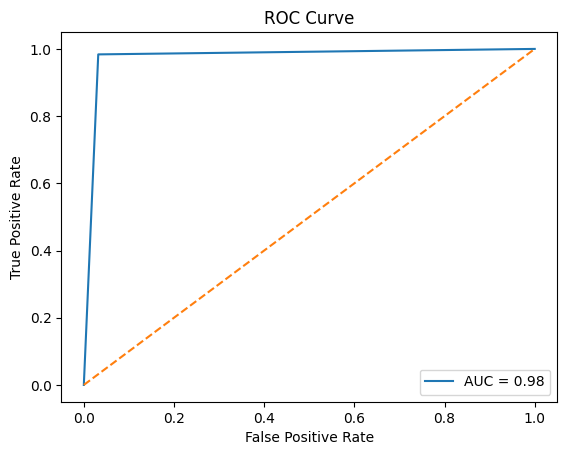

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

## **🧠 MODULE 6: Visualization Using Grad-CAM**

### **Functional API CNN for Brain Tumor Detection**

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Input layer
input_layer = Input(shape=(100, 100, 3))

# Convolutional layers
x = Conv2D(32, (3, 3), activation='relu')(input_layer)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.3)(x)

# Fully connected layers
x = Flatten()(x)
x = Dense(64, activation='relu')(x)
output_layer = Dense(2, activation='softmax')(x)

# Build model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 100, 100, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 33856)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     2,166,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,186,370 (8.34 MB)

 Trainable params: 2,186,370 (8.34 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.save("brain_tumor_CNN_model.h5")

### **Grad-CAM**

It creates a heatmap showing the model’s focus area.

🔴 Red = High focus

🔵 Blue = Low focus

It helps confirm if the model looks at the tumor region or not.

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2

# Function to generate Grad-CAM heatmap
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])
        class_channel = predictions[:, pred_index]

    # Compute gradients
    grads = tape.gradient(class_channel, conv_outputs)

    # Compute channel-wise mean of gradients
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Weight the output feature map
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # Normalize between 0 and 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

### **Applying on One selected Image**

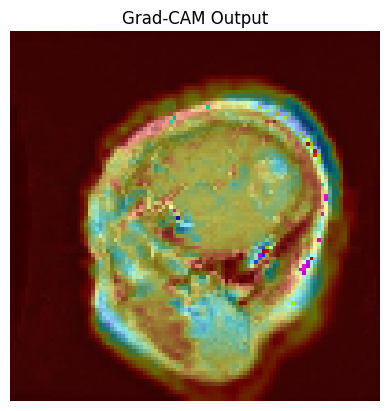

In [ ]:
# Load an image and preprocess
img = cv2.imread("/content/drive/MyDrive/HireBridge AI   ML Projects/Brain Tumor Dataset/yes/gg (196).jpg")
img = cv2.resize(img, (100, 100))
img = img / 255.0
img_array = np.expand_dims(img, axis=0)

# Run Grad-CAM
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name="conv2d_1")

# Overlay heatmap on original image
def display_gradcam(img, heatmap, alpha=0.4):
    heatmap_resized = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap_colored = cv2.applyColorMap(np.uint8(255 * heatmap_resized), cv2.COLORMAP_JET)
    superimposed_img = heatmap_colored * alpha + np.uint8(255 * img)
    return np.uint8(superimposed_img)

# Show
gradcam_img = display_gradcam(img, heatmap)
plt.imshow(gradcam_img)
plt.axis('off')
plt.title("Grad-CAM Output")
plt.show()

## **📊 Sample Evaluation**

Applying Grad-CAM to random images from both classes:

*   Shows prediction vs actual (✅/❌)
*   Displays both original and heatmap
*   Calculates sample accuracy

This gives a visual + statistical check of model performance.

In [ ]:
import os
import random
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

# Parameters
TEST_DIR = "/content/drive/MyDrive/HireBridge AI   ML Projects/Brain Tumor Dataset"
CLASS_NAMES = ["yes", "no"]
IMAGE_SIZE = (100, 100)
N = 5

# Load random test images
def load_random_images(test_dir, n=5):
    images, labels, paths = [], [], []
    for label, class_name in enumerate(CLASS_NAMES):
        class_dir = os.path.join(test_dir, class_name)
        image_names = random.sample(os.listdir(class_dir), n)
        for img_name in image_names:
            path = os.path.join(class_dir, img_name)
            img = cv2.imread(path)
            if img is not None:
                img_resized = cv2.resize(img, IMAGE_SIZE)
                images.append(img_resized / 255.0)
                labels.append(label)
                paths.append(path)
    return np.array(images), np.array(labels), paths

# Grad-CAM generator
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])
        class_channel = predictions[:, pred_index]
    grads = tape.gradient(class_channel, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

# Overlay heatmap on image
def display_gradcam(img, heatmap, alpha=0.4):
    heatmap_resized = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap_colored = cv2.applyColorMap(np.uint8(255 * heatmap_resized), cv2.COLORMAP_JET)
    superimposed_img = heatmap_colored * alpha + np.uint8(255 * img)
    return np.uint8(superimposed_img)

# Run Grad-CAM on random images
def evaluate_with_gradcam(model, last_conv_layer_name):
    images, labels, paths = load_random_images(TEST_DIR, n=N)
    predictions = model.predict(images)
    predicted_labels = np.argmax(predictions, axis=1)

    correct = 0
    for i in range(len(images)):
        img = images[i]
        label = labels[i]
        pred = predicted_labels[i]

        heatmap = make_gradcam_heatmap(np.expand_dims(img, axis=0), model, last_conv_layer_name)
        gradcam_img = display_gradcam(img, heatmap)

        plt.figure(figsize=(4, 2))
        plt.subplot(1, 2, 1)
        plt.imshow(img)
        plt.title(f"Original \n True: {CLASS_NAMES[label]}")
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(gradcam_img)
        match = "✔️" if pred == label else "✖"
        plt.title(f"Grad-CAM \n Pred: {CLASS_NAMES[pred]} {match}")
        plt.axis('off')

        plt.tight_layout()
        plt.show()

        if pred == label:
            correct += 1

    print(f"\n\nGRAD-CAM ACCURACY ON {len(images)} SAMPLES: {correct / len(images):.2f}\n")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


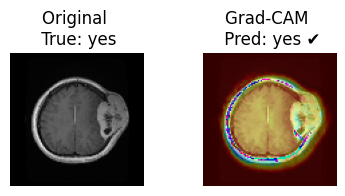

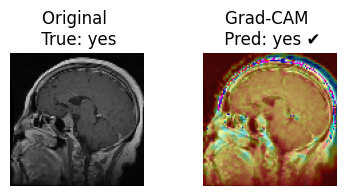

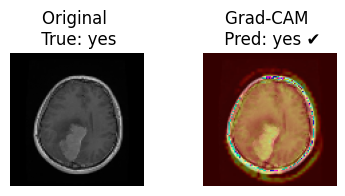

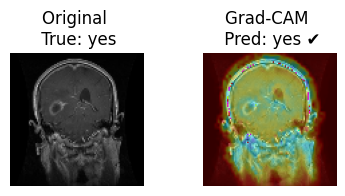

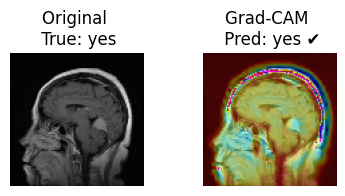

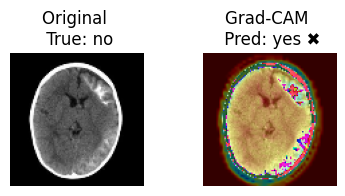

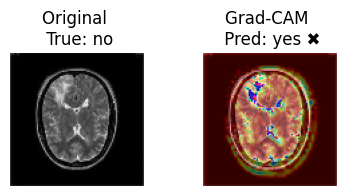

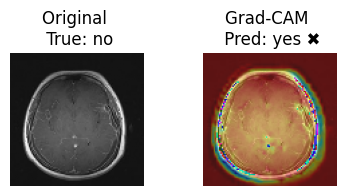

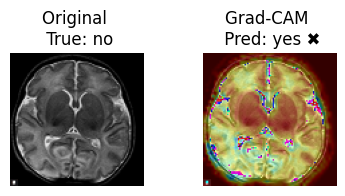

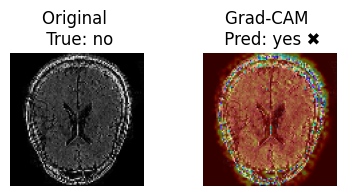



GRAD-CAM ACCURACY ON 10 SAMPLES: 0.50



In [ ]:
evaluate_with_gradcam(model, last_conv_layer_name="conv2d_1")

# MODULE 7: TESTING

In [ ]:
trained_model = tf.keras.models.load_model("brain_tumor_CNN_model.h5")

In [ ]:
from tensorflow.keras.models import load_model

trained_model = load_model("brain_tumor_CNN_model.h5")

### **Unseen, Test Dataset**

In [ ]:
import os, cv2, random, numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

TEST_DIR = "/content/drive/MyDrive/HireBridge AI   ML Projects/Brain Tumor Dataset/Test"
CLASS_NAMES = ["yes", "no"]
IMAGE_SIZE = (100, 100)
N = 5  # Number of test images per class

In [ ]:
# --- Utility: Load Random Images Safely ---
def load_random_images(test_dir, n=5):
    images, labels, paths = [], [], []
    for label, class_name in enumerate(CLASS_NAMES):
        class_dir = os.path.join(test_dir, class_name)
        image_files = os.listdir(class_dir)
        if len(image_files) < n:
            print(f"⚠️ Not enough images in class '{class_name}'")
            continue
        random_imgs = random.sample(image_files, n)
        for img_name in random_imgs:
            try:
                path = os.path.join(class_dir, img_name)
                img = cv2.imread(path)
                if img is None:
                    print(f"❌ Failed to load image: {path}")
                    continue
                img = cv2.resize(img, IMAGE_SIZE)
                images.append(img / 255.0)
                labels.append(label)
                paths.append(path)
            except Exception as e:
                print(f"❌ Error reading {img_name}: {e}")
    return np.array(images), np.array(labels), paths

# --- Grad-CAM Function ---
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = tf.keras.models.Model([model.inputs],
                                       [model.get_layer(last_conv_layer_name).output, model.output])
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])
        class_channel = predictions[:, pred_index]
    grads = tape.gradient(class_channel, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap + 1e-6)
    return heatmap.numpy()

# --- Grad-CAM Overlay ---
def display_gradcam(img, heatmap, alpha=0.4):
    heatmap_resized = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap_colored = cv2.applyColorMap(np.uint8(255 * heatmap_resized), cv2.COLORMAP_JET)
    superimposed_img = heatmap_colored * alpha + np.uint8(255 * img)
    return np.uint8(superimposed_img)

# --- Example Augmentation: Rotation ---
def rotate_image(image, angle):
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h))
    return rotated

# --- Main Testing Function ---
def test_model_on_random_images(model, last_conv_layer_name):
    print("📦 Loading random test images...")
    images, labels, paths = load_random_images(TEST_DIR, n=N)

    if len(images) == 0:
        print("❌ No test images loaded. Aborting.")
        return

    predictions = model.predict(images)
    predicted_labels = np.argmax(predictions, axis=1)

    correct = 0
    for i in range(len(images)):
        original = images[i]
        label = labels[i]
        pred = predicted_labels[i]
        confidence = np.max(predictions[i])

        # Apply augmentation to simulate unseen case
        unseen_image = rotate_image(original, angle=25)

        # Grad-CAM
        heatmap = make_gradcam_heatmap(np.expand_dims(unseen_image, axis=0), model, last_conv_layer_name)
        gradcam_img = display_gradcam(unseen_image, heatmap)

        # Display
        plt.figure(figsize=(5, 3))
        plt.subplot(1, 3, 1)
        plt.imshow(original)
        plt.title(f"Original\nTrue: {CLASS_NAMES[label]}")
        plt.axis('off')

        plt.subplot(1, 3, 2)
        plt.imshow(unseen_image)
        plt.title("Unseen (Rotated)")
        plt.axis('off')

        plt.subplot(1, 3, 3)
        plt.imshow(gradcam_img)
        match = "✔️" if pred == label else "✖"
        plt.title(f"Pred: {CLASS_NAMES[pred]} {match}\nConfidence: {confidence:.2f}")
        plt.axis('off')

        plt.tight_layout()
        plt.show()

        if pred == label:
            correct += 1

    acc = correct / len(images)
    print(f"\n✅ Grad-CAM Accuracy on {len(images)} Random Samples: {acc:.2f}")

📦 Loading random test images...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


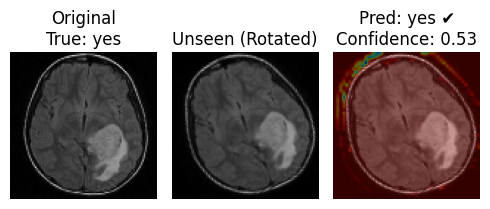

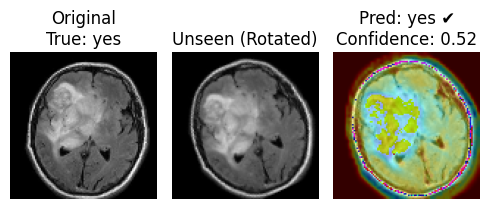

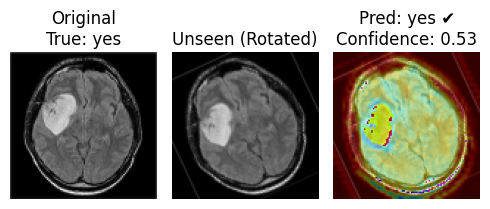

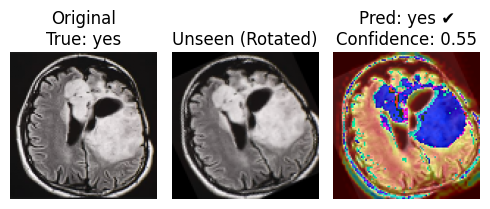

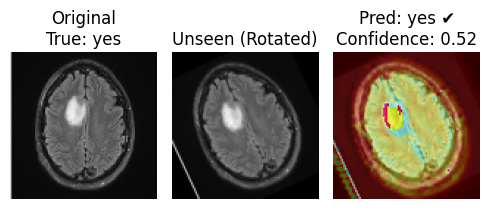

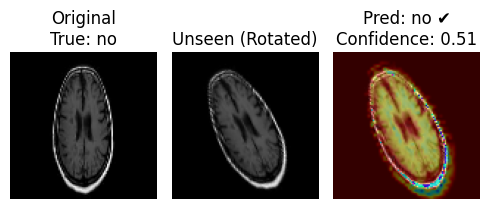

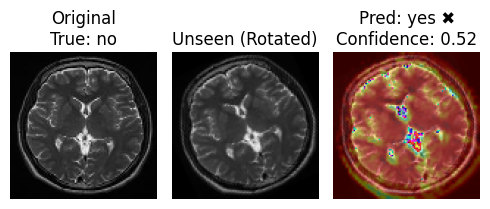

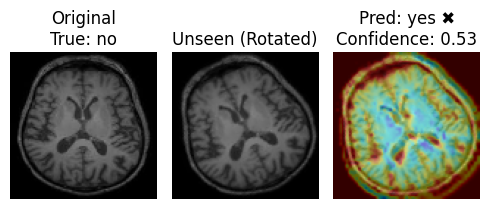

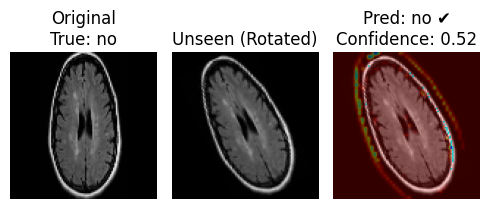

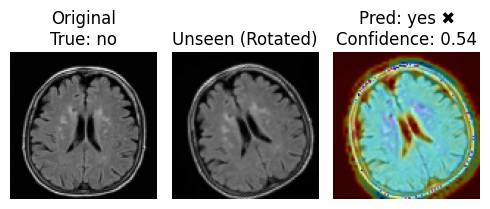


✅ Grad-CAM Accuracy on 10 Random Samples: 0.70


In [ ]:
test_model_on_random_images(trained_model, last_conv_layer_name="conv2d_1")

# MODULE 8: DEPLOYEMENT

In [ ]:
#!pip install gradio

from google.colab import drive
import os
import gradio as gr
from tensorflow.keras.models import load_model
import cv2
import numpy as np

# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

# Verify Brain Tumor Dataset contents
dataset_path = '/content/drive/MyDrive/HireBridge AI   ML Projects/Brain Tumor Dataset'
print("Files in Brain Tumor Dataset:", os.listdir(dataset_path))

# Load the model
model_path = '/content/drive/MyDrive/HireBridge AI   ML Projects/Brain Tumor Dataset/brain_tumor_model.keras'
model = load_model(model_path)
print("Model loaded successfully!")
print("Model input shape:", model.input_shape)

# Define prediction function
def predict_tumor(image):
    # Resize image to match model input (100x100)
    image = cv2.resize(image, (100, 100))
    # Normalize pixel values
    image = image / 255.0
    # Add batch dimension
    image = np.expand_dims(image, axis=0)
    # Make prediction
    prediction = model.predict(image)
    prob = prediction[0][0]
    # Return result
    if prob > 0.5:
        return f"Tumor detected with probability {prob:.2f}"
    else:
        return f"No tumor with probability {1 - prob:.2f}"

# Create Gradio interface
iface = gr.Interface(
    fn=predict_tumor,
    inputs=gr.Image(),
    outputs=gr.Textbox(),
    title="Brain Tumor Detection",
    description="Upload an MRI image to detect if there is a brain tumor."
)

# Launch the interface
iface.launch()

Mounted at /content/drive
Files in Brain Tumor Dataset: ['no', 'yes', 'brain_tumor_model.keras', 'Test']
Model loaded successfully!
Model input shape: (None, 100, 100, 3)
It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://0a165fd216ff108223.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
